1. Viết mô hình Linear Regession bằng Pytorch


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nhattminh160901/Do_An_2022/main/insurance.csv")
df = pd.DataFrame(data)

non_smoker_df = df[df["smoker"] == "no"]
smoker_df = df[df["smoker"] == "yes"]
smoker_df1 = smoker_df[smoker_df["charges"]>30000]
Q1 = smoker_df1["charges"].quantile(0.25)
Q3 = smoker_df1["charges"].quantile(0.75)
IQR = Q3 - Q1

smoker_df1 = smoker_df1[(Q1 - 1.5*IQR < smoker_df1["charges"]) &  (smoker_df1["charges"] < Q3 + 1.5*IQR)]
X, y = smoker_df1.age.values, smoker_df1.charges.values
X = preprocessing.normalize([X]).reshape(-1, 1)
y = preprocessing.normalize([y])


In [ ]:
X

Epoch [100/1000], Loss: 0.0002
Epoch [200/1000], Loss: 0.0002
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


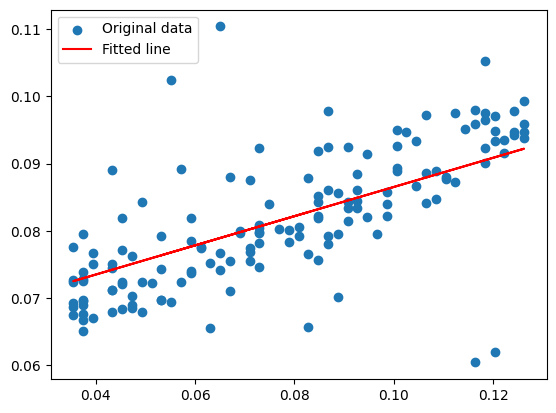

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Chuyển đổi dữ liệu sang định dạng tensor của PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Mô hình Linear Regression
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# Hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.15)

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward và optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Trực quan hóa kết quả
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, label='Fitted line', color='r')
plt.legend()
plt.show()


2. Viết mô hình Lgistic Regession bằng Pytorch


Epoch [100/1000], Loss: 0.2794
Epoch [200/1000], Loss: 0.2438
Epoch [300/1000], Loss: 0.2205
Epoch [400/1000], Loss: 0.2037
Epoch [500/1000], Loss: 0.1908
Epoch [600/1000], Loss: 0.1805
Epoch [700/1000], Loss: 0.1720
Epoch [800/1000], Loss: 0.1649
Epoch [900/1000], Loss: 0.1588
Epoch [1000/1000], Loss: 0.1534
Accuracy: 0.5096


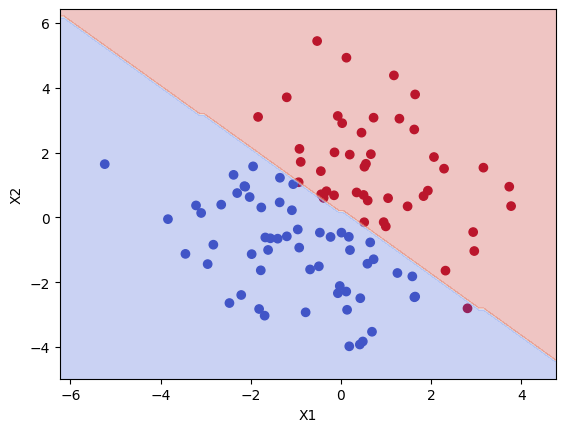

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu giả định
np.random.seed(42)
X = np.random.randn(100, 2) * 2
y = ((X[:,0] + X[:,1]) > 0).astype(np.float32)  # Tạo nhãn dựa trên điều kiện đường thẳng x1 + x2 > 0

# Chuyển đổi dữ liệu sang định dạng tensor của PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape y để đảm bảo kích thước phù hợp với đầu ra của mô hình

# Mô hình Logistic Regression
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Khởi tạo mô hình
input_dim = 2
model = LogisticRegression(input_dim)

# Hàm loss và optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward và optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Đánh giá mô hình trên tập dữ liệu huấn luyện
with torch.no_grad():
    predicted = model(X_tensor).detach().numpy()
    predicted_classes = (predicted > 0.5).astype(np.float32)
    accuracy = np.mean(predicted_classes == y)
    print(f'Accuracy: {accuracy}')

# Trực quan hóa kết quả
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')

# Vẽ đường phân cách
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid_tensor = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
Z = model(grid_tensor)
Z = (Z > 0.5).float()
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.show()


3.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Dữ liệu đầu vào
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

# Nhãn
y = np.array([0, 1, 1, 0], dtype=np.float32)

# Chuyển đổi thành đối tượng Tensor của PyTorch
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)